In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

In [3]:
ITERATESMAX = 500 # You can adjust this value as needed
alpha = 1 # Adjust alpha value as needed
beta = 0.5
exponent1 = 2 # Adjust exponent1 value as needed
exponent2 = 0.5 # Adjust exponent2 value as needed
convergence_diff = 0.001
break_on_converge = False

Final x1: 9.000000000465661
Final x2: 9.000000000465661
Average Utilization: 15.051999999986956
Average Utilization %: 75.25999999993478 %


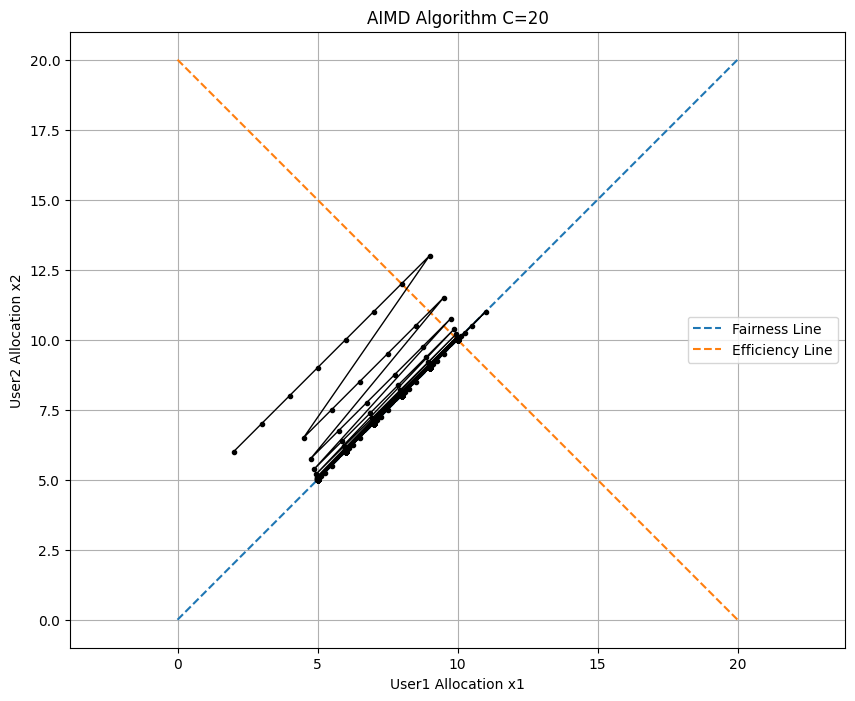

<Figure size 640x480 with 0 Axes>

In [3]:
C = 20 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
alpha1 = alpha
alpha2 = alpha
beta1 = beta
beta2 = beta
converge_i = -1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        # Simulate network condition (for example, congestion)
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break
# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)


plot_name = 'AIMD Algorithm C=20'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 48
Final x1: 33.999996185302734
Final x2: 34.0000114440918
Average Utilization: 72.86399935913086
Average Utilization %: 72.86399935913086 %


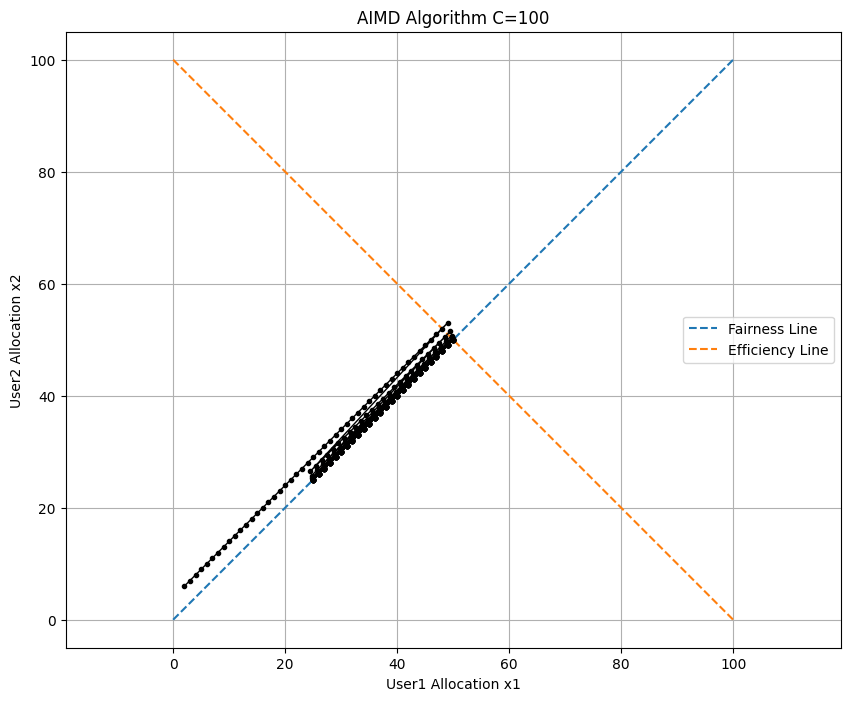

<Figure size 640x480 with 0 Axes>

In [4]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
alpha1 = alpha
alpha2 = alpha
beta1 = beta
beta2 = beta
converge_i = -1
first_congestion = -1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i)) 
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break
# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")


plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'AIMD Algorithm C=100'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 104
Final x1: 17.95673025171121
Final x2: 42.45974256383621
Average Utilization: 67.70230342526519
Average Utilization %: 67.70230342526519 %


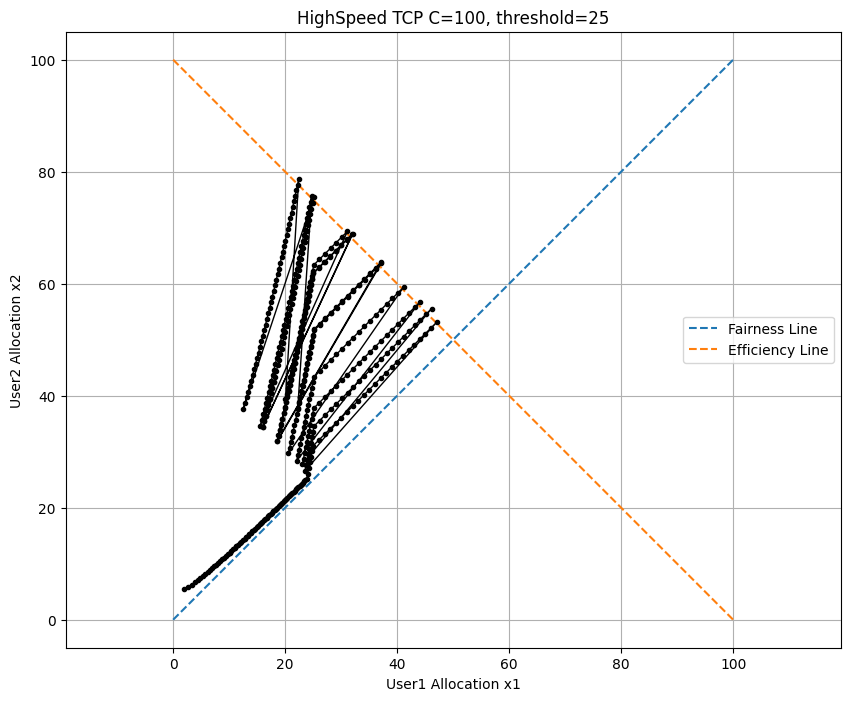

<Figure size 640x480 with 0 Axes>

In [5]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
threshold = 25
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        if x1 > threshold: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > threshold: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > threshold: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > threshold: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'HighSpeed TCP C=100, threshold=25'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 57
Final x1: 24.999988829666012
Final x2: 25.000012107883894
Average Utilization: 71.81382214576946
Average Utilization %: 71.81382214576946 %


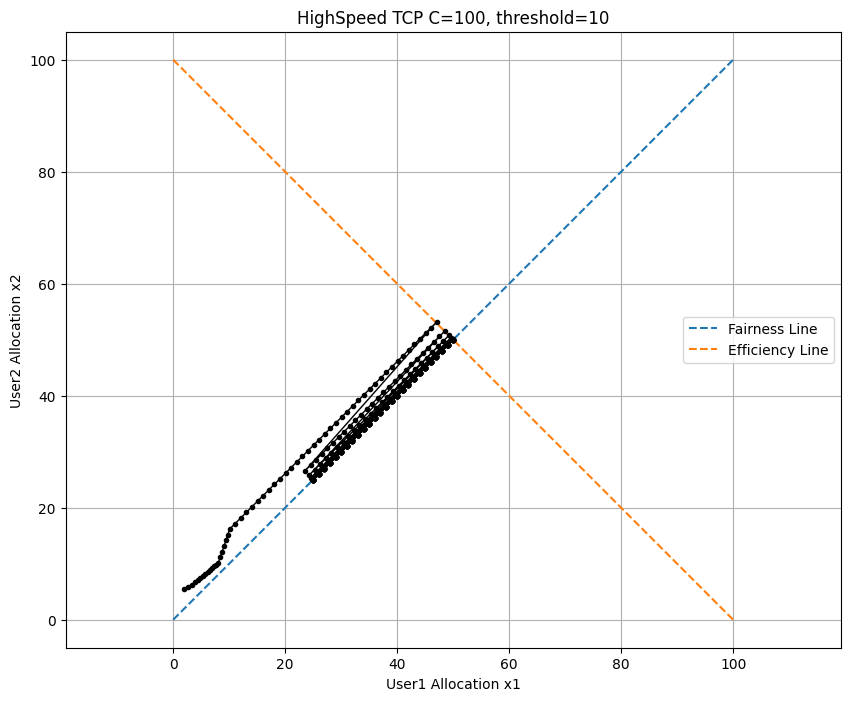

<Figure size 640x480 with 0 Axes>

In [6]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
threshold = 10
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        if x1 > threshold: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > threshold: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > threshold: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > threshold: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'HighSpeed TCP C=100, threshold=10'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 48
Final x1: 43.39840582539526
Final x2: 43.39843435977354
Final ssthresh1: 25.19919788676421 ssthresh2: 25.19922653437679
Average Utilization: 72.73529321849017
Average Utilization %: 72.73529321849017 %


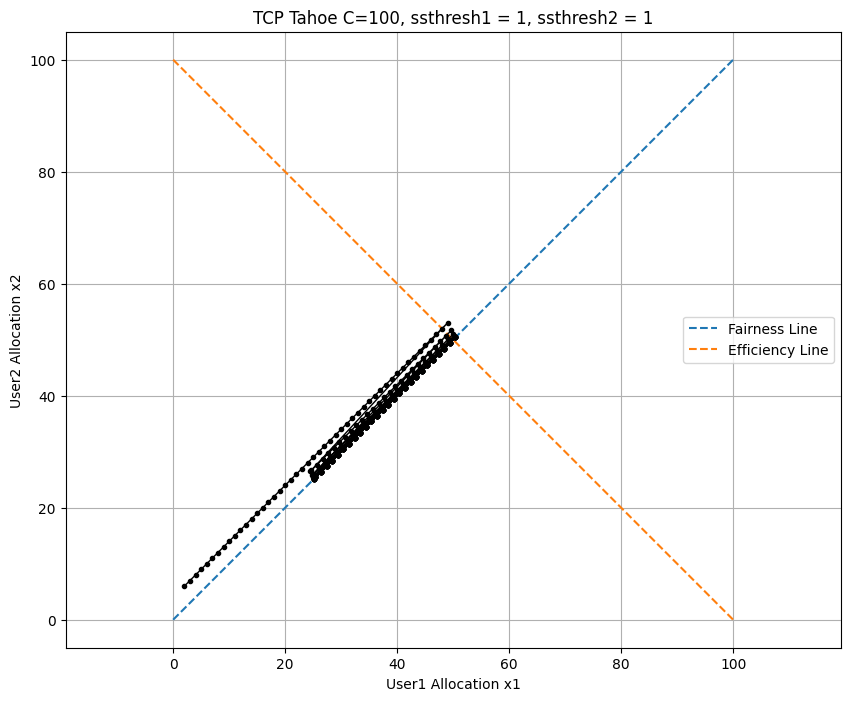

<Figure size 640x480 with 0 Axes>

In [7]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
ssthresh1 = 1
ssthresh2 = 1
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        if x1 > ssthresh1: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > ssthresh2: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > ssthresh1: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > ssthresh2: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        ssthresh1 = x1 /2
        ssthresh2 = x2 /2
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Final ssthresh1:", ssthresh1, "ssthresh2:", ssthresh2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'TCP Tahoe C=100, ssthresh1 = 1, ssthresh2 = 1'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

In [8]:
f = open("chatGPTapiKey.txt", "r")
chatGPT_apikey = f.read() 

url = "https://api.openai.com/v1/chat/completions"
model = "gpt-4o-mini" 
temperature = 0

# Set the headers for authentication and content type
headers = {
    "Authorization": f"Bearer {chatGPT_apikey}",
    "Content-Type": "application/json"
}

conversation_history = [
    {"role": "system", "content": "In this TCP protocol using power rule. Calculate the predicted future allocation and predict if there will be congestion 3 iterations later occurs when the predicted future allocation exceeds available allocation. Reply only with 'Congestion in 3 iterations' or 'No congestion in 3 iterations'."}  # System message to set up the assistant
]

MAX_USER_MESSAGES = 5  # Maximum number of user messages to keep before culling so I don't go bankrupt

def send_message_to_chatgpt(user_message):
    global conversation_history
    
    conversation_history.append({"role": "user", "content": user_message})
    
    # Cull the history
    user_messages = [msg for msg in conversation_history if msg['role'] == 'user']
    if len(user_messages) > MAX_USER_MESSAGES:
        del conversation_history[1] # Remove the oldest user message
        # del conversation_history[1] # Remove the oldest assistant message
    # Define the payload (conversation history + other parameters)
    data = {
        "model": model,  # Specify GPT-4o-mini model
        "messages": conversation_history,
        "max_tokens": 150,
        "temperature": temperature
    }

    # Send the POST request
    response = requests.post(url, headers=headers, data=json.dumps(data))
    
    # Check if the request was successful
    if response.status_code == 200:
        response_data = response.json()
        assistant_message = response_data["choices"][0]["message"]["content"]
        if not assistant_message == "Congestion in 3 iterations" or not assistant_message == "No congestion in 3 iterations":
            return assistant_message
        else:
            return f"Error: {response.status_code}, {response.text}"
    else:
        return f"Error: {response.status_code}, {response.text}"


First iteration reaching efficiency line: 8
Final x1: 11.90560301604288
Final x2: 11.905603017026863
Average Utilization: 25.53702461537653
Average Utilization %: 25.53702461537653 %


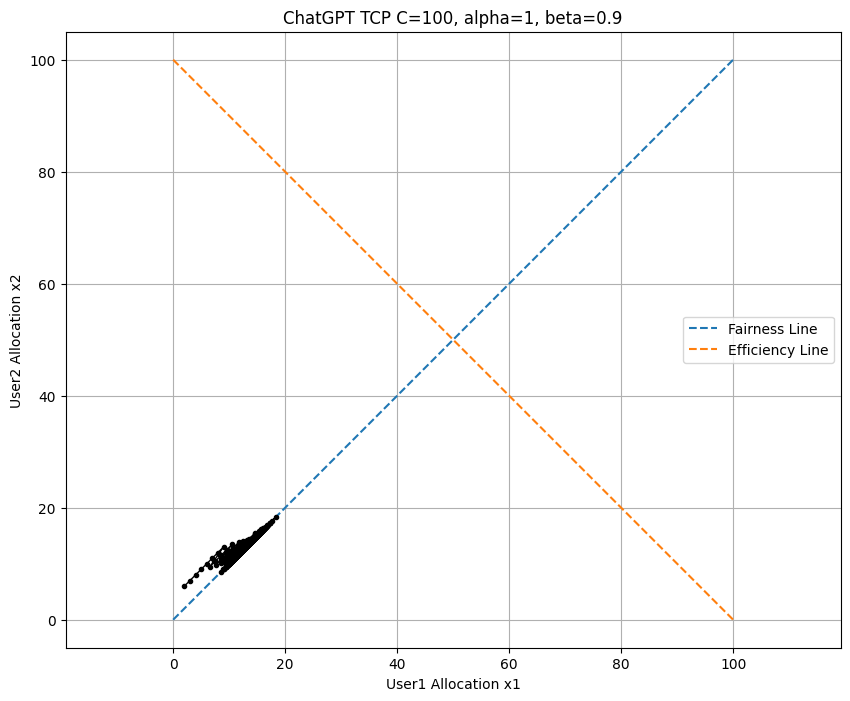

<Figure size 640x480 with 0 Axes>

In [11]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.9
x1 = 1
x2 = 5
threshold = 0
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
predicted_congestion = [0, 0, 0]
prompt = "Reply with 'No congestion in 3 iterations'"
predictionStr = "No congestion in 3 iterations"
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    
    if((predicted_congestion[0] == 0) and (x1 + x2 <= C)): no_congestion = 1
    else: no_congestion = 0

    if (no_congestion):
        if x1 > threshold: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > threshold: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        curr_x = x1 + x2
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > threshold: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > threshold: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        curr_x = x1 + x2
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    
    predicted_congestion[0], predicted_congestion[1] = predicted_congestion[1], predicted_congestion[2]
    prompt = "Iteration " + str(i) + " Total Allocation " + str(curr_x) + " Next Iteration's Total Allocation " + str(x1 + x2) + " Available Allocation " + str(C)
    predictionStr = send_message_to_chatgpt(prompt)
    if(predictionStr == "Congestion in 3 iterations"): predicted_congestion[2] = 1
    else: predicted_congestion[2] = 0
    # print(prompt + " " + predictionStr)

    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(10, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'ChatGPT TCP C=100, alpha=1, beta=0.9'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

In [8]:
ITERATESMAX = 50000 # You can adjust this value as needed

First iteration reaching efficiency line: 12498
Final x1: 12495.984375
Final x2: 12496.046875
Average Utilization: 17188.746170625
Average Utilization %: 68.7549846825 %


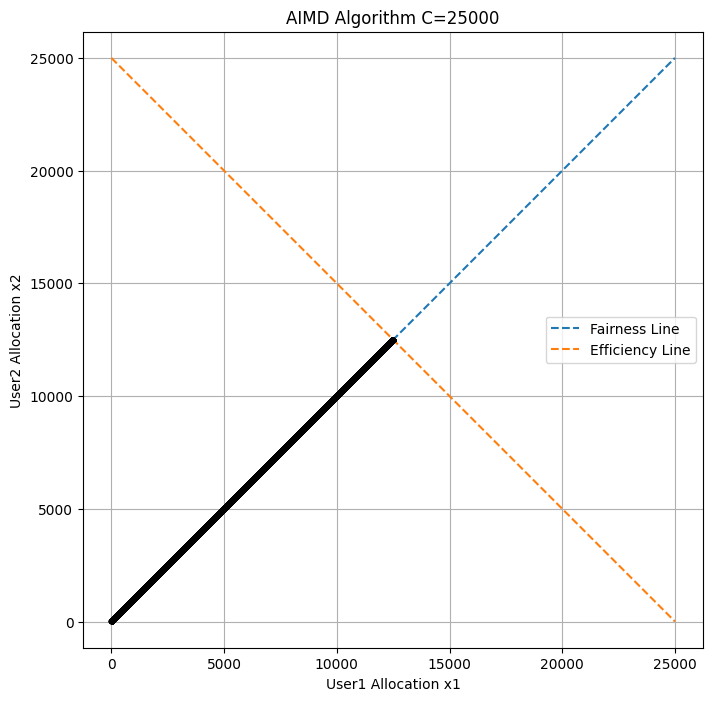

<Figure size 640x480 with 0 Axes>

In [12]:
C = 25000 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
alpha1 = alpha
alpha2 = alpha
beta1 = beta
beta2 = beta
converge_i = -1
first_congestion = -1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i)) 
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break
# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")


plt.figure(figsize=(8, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'AIMD Algorithm C=25000'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 231
Final x1: 47.37130416762074
Final x2: 47.37130416762075
Average Utilization: 96.46850862187769
Average Utilization %: 96.46850862187769 %


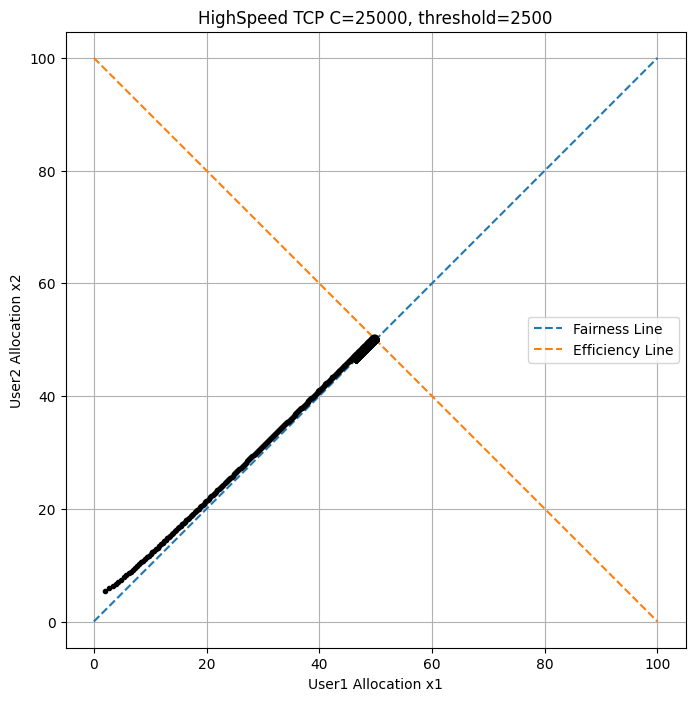

<Figure size 640x480 with 0 Axes>

In [13]:
C = 100 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
threshold = 2500
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        if x1 > threshold: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > threshold: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > threshold: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > threshold: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(8, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'HighSpeed TCP C=25000, threshold=2500'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")

First iteration reaching efficiency line: 12498
Final x1: 12490.009278008643
Final x2: 12490.071777629186
Final ssthresh1: 6249.996628894592 ssthresh2: 6250.059128578379
Average Utilization: 17187.27948450409
Average Utilization %: 68.74911793801637 %


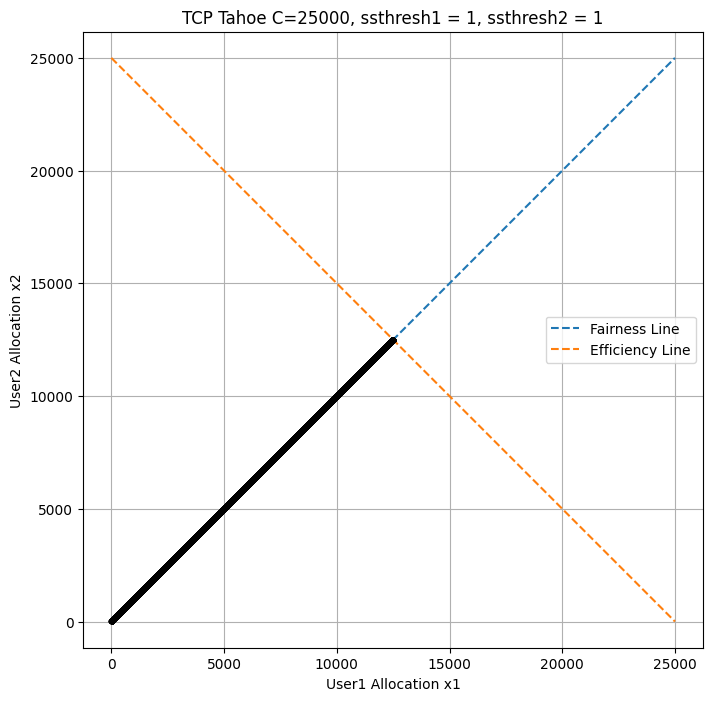

<Figure size 640x480 with 0 Axes>

In [14]:
C = 25000 # Adjust C value as needed (maximum capacity)
alpha = 1 # Adjust alpha value as needed
beta = 0.5
x1 = 1
x2 = 5
ssthresh1 = 1
ssthresh2 = 1
converge_i = -1
first_congestion = -1
scaling_factor = 0.5 # usually between .5 to 1

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
utilization_values = np.zeros(ITERATESMAX)
for i in range(ITERATESMAX):
    # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
    if (x1 + x2 <= C):
        if x1 > ssthresh1: alpha1 = alpha
        else: alpha1 = alpha * ((x1**scaling_factor) / x1)
        if x2 > ssthresh2: alpha2 = alpha
        else: alpha2 = alpha * ((x2**scaling_factor )/ x2)
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
    else:
        if(first_congestion == -1): first_congestion = i
        # Simulate network condition (for example, congestion)
        if x1 > ssthresh1: beta1 = beta
        else : beta1 = (1 - ((1/(x1**scaling_factor)) * beta))
        if x2 > ssthresh2: beta2 = beta
        else : beta2 = (1 - ((1/(x2**scaling_factor)) * beta))
        ssthresh1 = x1 /2
        ssthresh2 = x2 /2
        x1 = x1 * beta1
        x2 = x2 * beta2
        # pause(1)
    # Store values in arrays
    x1_values[i] = x1
    x2_values[i] = x2
    utilization_values[i] = x1 + x2
    if((abs(x1 - x2) < convergence_diff) and (converge_i == -1) and break_on_converge):
        converge_i = i
        print("Converged at: " + str(i))
        x1_values = x1_values[:i+1]
        x2_values = x2_values[:i+1]
        utilization_values = utilization_values[:i+1]
        break

# Display the final values
print("First iteration reaching efficiency line:", first_congestion)
print("Final x1:", x1)
print("Final x2:", x2)
print("Final ssthresh1:", ssthresh1, "ssthresh2:", ssthresh2)
print("Average Utilization:", sum(utilization_values)/len(utilization_values))
print("Average Utilization %:", (sum(utilization_values)/len(utilization_values))/ C * 100, "%")

plt.figure(figsize=(8, 8))

# fairness line, x1 = x2
x1_fairness_line = np.linspace(0, C, 100)
plt.plot(x1_fairness_line, x1_fairness_line, '--', label='Fairness Line')

# efficiency line, x1 + x2 = C
x1_efficiency_line = np.linspace(0, C, 100)
x2_efficiency_line = C - x1_efficiency_line
plt.plot(x1_efficiency_line, x2_efficiency_line, '--', label='Efficiency Line')

plt.plot(x1_values, x2_values, color = 'black', marker='.', linewidth = 1)

plot_name = 'TCP Tahoe C=25000, ssthresh1 = 1, ssthresh2 = 1'
plt.xlabel("User1 Allocation x1")
plt.ylabel("User2 Allocation x2")
plt.title(plot_name)
plt.legend()

plt.grid(True)
plt.axis('equal')
plt.show()
plt.savefig(plot_name + ".svg")